**Download required packages**


In [20]:
#%pip install --upgrade pip
#%pip install -U PyMuPDF
#%pip install fitz
#%pip install datasets==1.2.1
#%pip install rouge_score
#%pip install wordcloud

**Importing the libraries required**

In [21]:
# for Pdf file
import fitz 

# For wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Models for text summarization
from transformers import LEDForConditionalGeneration, LEDTokenizer,AutoConfig

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [22]:
# Import Independenties.
from pathlib import Path
import torch
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


Import Model And It's Tokenizer And Config files

In [23]:

model_path = f'E:/Model Matiral/the model'
tokenizer = LEDTokenizer.from_pretrained(model_path)
model = LEDForConditionalGeneration.from_pretrained(model_path)

config = AutoConfig.from_pretrained(model_path)

Load the pdf file And Print number of pages and metadata of pdf.

In [24]:
# Open the PDF document
pdf_doc = fitz.open(f"E:/Model Matiral/the model/Rich Dad Poor Dad Robert T. Kiyosaki .pdf")

num_pages = pdf_doc.page_count
print(f"Number of pages: {num_pages}")
metadata = pdf_doc.metadata
print(f"Metadata: {metadata}")

Number of pages: 215
Metadata: {'format': 'PDF 1.4', 'title': 'Rich Dad Poor Dad: What the Rich Teach Their Kids About MoneyThat the Poor and Middle Class Do Not!', 'author': 'Robert T. Kiyosaki', 'subject': '', 'keywords': '', 'creator': 'calibre (4.6.0) [http://calibre-ebook.com]', 'producer': 'calibre (4.6.0) [http://calibre-ebook.com]', 'creationDate': "D:20200301105028+00'00'", 'modDate': "D:20200301135028+03'00'", 'trapped': '', 'encryption': None}


Convert It To Text

In [25]:
text_of_book = ""

# Loop through all pages and concatenate text
for page_number in range(pdf_doc.page_count):
    page = pdf_doc[page_number]
    text = page.get_text()
    
    # Concatenate text from each page
    text_of_book += text

# Print the concatenated text. This concatnated text is the whole book.
print(text_of_book)

“Rich Dad Poor Dad is a starting point for anyone looking to gain
control of their financial future.”
– USA TODAY
If you purchase this book without a cover, or purchase a PDF, jpg, or tiff copy of this book, it is
likely stolen property or a counterfeit. In that case, neither the authors, the publisher, nor any of their
employees or agents has received any payment for the copy. Furthermore, counterfeiting is a known
avenue of financial support for organized crime and terrorist groups. We urge you to please not
purchase any such copy and to report any instance of someone selling such copies to Plata Publishing
LLC.
This publication is designed to provide competent and reliable information regarding the subject
matter covered. However, it is sold with the understanding that the author and publisher are not
engaged in rendering legal, financial, or other professional advice. Laws and practices often vary
from state to state and country to country and if legal or other expert assistance is

**Function to summarize text**

In [26]:
"""" Args:
text (str): The input text to be summarized.
model_path (str, optional): The path to the pre-trained model checkpoint. Defaults to model_path.
max_length (int, optional): The maximum length of the output summary. Defaults to 1000.

Return string :  The summarized text. """


def abstractive_summarization(text, model_path=model_path, max_length= 1000):
    
    # Tokenize and generate summary
    inputs_ids = tokenizer.encode(text, return_tensors="pt",truncation=True,max_length=2000)
    
    # Global attention on the first token 
    global_attention_mask = torch.zeros_like(inputs_ids)
    global_attention_mask[:, 0] = 1
    
    sequences = model.generate(inputs_ids, global_attention_mask=global_attention_mask, max_length=2000, min_length=50,length_penalty=2.0, num_beams=5, early_stopping=True)
    summary = tokenizer.batch_decode(sequences, skip_special_tokens=True,clean_up_tokenization_spaces=True)

    return summary

Perform abstractive summarization

In [27]:
summarized_text = abstractive_summarization(text_of_book)


print("Original Text Length:", len(text_of_book))
print("Summarized Text Length:", len(summarized_text))
print("\nSummarized Text:\n", summarized_text)


Original Text Length: 350453
Summarized Text Length: 1

Summarized Text:
 ['Having two fathers offers the reader the option of "one of a rich man and one of a poor man." Fortunately, David has both of these men in his life. One is highly educated and intelligent; the other is not. Both men work hard and have had successful careers, but one has always struggled financially while the other has become one of the richest men in Hawaii. Although they offer different kinds of advice, David chooses for himself whether to accept or reject their differing points of view. Having two fathers forces him to think and to choose for himself. He believes that having two strong fathers influences one influencing him the most, although they may not agree with each other. David\'s book, titled Rich Dad Poor Dad, provides readers with several different types of advice including: How to Become Rich without cutting up your credit cards; How to Get Rich and Stay Rich; Rich Dad’s Guide to Financial Education 

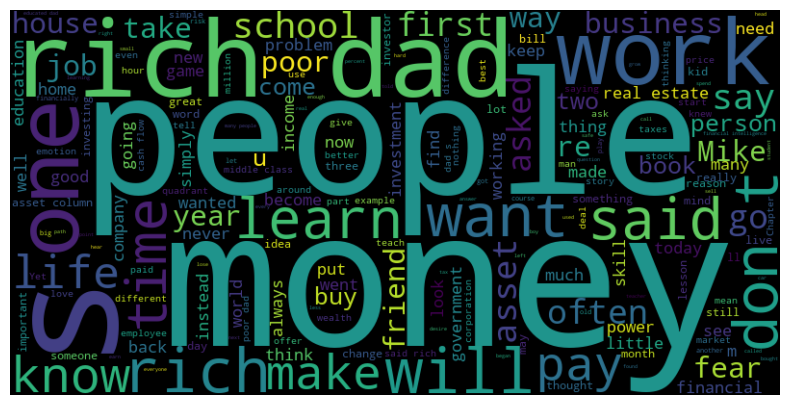

In [28]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_of_book)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()